In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
d=pd.read_excel(r'C:\Users\esvit\Downloads\Downloads\data science\intellipat\data\Dataset-Kmeans-xclara.csv.xlsx')
d.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


# Data Preprocessing

In [4]:
#duplicate
d.duplicated().sum()

0

In [5]:
#null
d.isnull().sum()

V1    0
V2    0
dtype: int64

In [6]:
#format
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      3000 non-null   float64
 1   V2      3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


# visualisation

In [13]:
import warnings 
warnings.filterwarnings('ignore')

In [20]:
d.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


<AxesSubplot:xlabel='V1', ylabel='Count'>

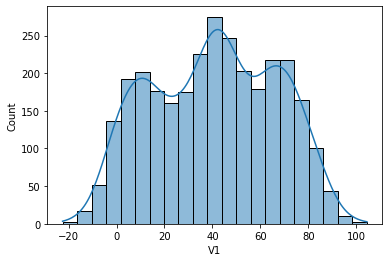

In [17]:
sns.histplot(d['V1'],kde=True)

<AxesSubplot:xlabel='V2', ylabel='Count'>

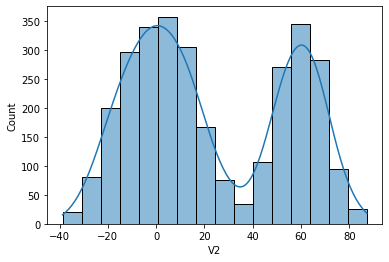

In [18]:
sns.histplot(d['V2'],kde=True)

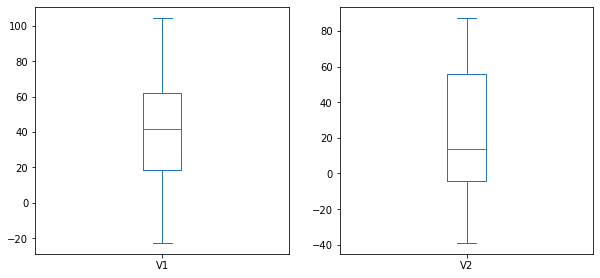

In [22]:
d.plot(kind='box',layout=(2,2),subplots=True,figsize=(10,10))
plt.show()

# MODEL BUILDING

Modle building without standardization

In [24]:
from sklearn.cluster import KMeans

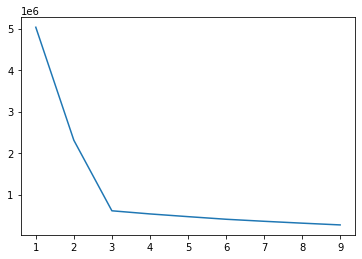

In [61]:
#Elbow method
n=list(range(1,10))
ssd=[]
for i in n:
    model=KMeans(n_clusters=i)
    model.fit(d)
    ssd.append(model.inertia_)
plt.plot(n,ssd)

In [76]:
kmean=KMeans(n_clusters=3)
kmean.fit(d)
kmean.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [77]:
label=kmean.predict(d)
label

array([0, 0, 0, ..., 2, 2, 2])

In [78]:
d['clusters']=label
d

,V1,V2,clusters
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0
...,...,...,...
2995,85.652800,-6.461061,2
2996,82.770880,-2.373299,2
2997,64.465320,-10.501360,2
2998,90.722820,-12.255840,2


In [96]:
d2=d[d.clusters==2]
d1=d[d.clusters==1]
d0=d[d.clusters==0]

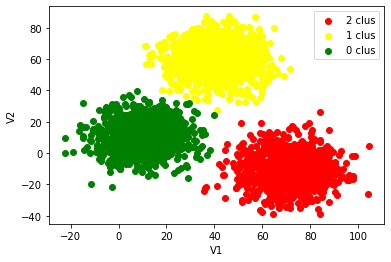

In [101]:
plt.scatter(data=d2,x='V1',y='V2',color='red',label='2 clus')
plt.scatter(data=d1,x='V1',y='V2',color='yellow',label='1 clus')
plt.scatter(data=d0,x='V1',y='V2',color='green',label='0 clus')
plt.xlabel('V1',fontsize=10)
plt.ylabel('V2',fontsize=10)
plt.legend()

plt.show()

In [66]:
from sklearn.metrics import silhouette_score

In [80]:
print('silhouette_score is',silhouette_score(d,label))

silhouette_score is 0.6946645950996625


# model buiding -standardization

In [48]:
d1=pd.read_excel(r'C:\Users\esvit\Downloads\Downloads\data science\intellipat\data\Dataset-Kmeans-xclara.csv.xlsx')
d1.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [49]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
d1_transformed=s.fit_transform(d1)


In [50]:
d1_=pd.DataFrame(d1_transformed,columns=d1.columns)
d1_

,V1,V2
0,-1.490597,-0.822054
1,-0.877001,-0.222877
2,-1.528841,-0.489474
3,-1.140630,-0.266274
4,-0.653644,-0.639420
...,...,...
2995,1.742096,-0.923437
2996,1.630630,-0.794706
2997,0.922614,-1.050673
2998,1.938192,-1.105924


In [51]:
np.round(d1_.describe(),1)

,V1,V2
count,3000.0,3000.0
mean,-0.0,0.0
std,1.0,1.0
min,-2.4,-1.9
25%,-0.9,-0.8
50%,0.0,-0.3
75%,0.8,1.0
max,2.5,2.0


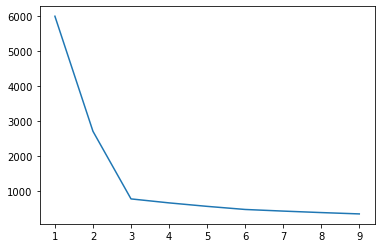

In [52]:
#Elbow method
n=list(range(1,10))
ssd=[]
for i in n:
    model=KMeans(n_clusters=i)
    model.fit(d1_)
    ssd.append(model.inertia_)
plt.plot(n,ssd)

In [53]:
kmean=KMeans(n_clusters=3)
kmean.fit(d1_)
kmean.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [55]:
label=kmean.predict(d1_)
label

array([2, 2, 2, ..., 1, 1, 1])

In [56]:
d1_['clusters']=label
d1_

,V1,V2,clusters
0,-1.490597,-0.822054,2
1,-0.877001,-0.222877,2
2,-1.528841,-0.489474,2
3,-1.140630,-0.266274,2
4,-0.653644,-0.639420,2
...,...,...,...
2995,1.742096,-0.923437,1
2996,1.630630,-0.794706,1
2997,0.922614,-1.050673,1
2998,1.938192,-1.105924,1


In [94]:
d1_0=d1_[d1_.clusters==0]
d1_1=d1_[d1_.clusters==1]
d1_2=d1_[d1_.clusters==2]

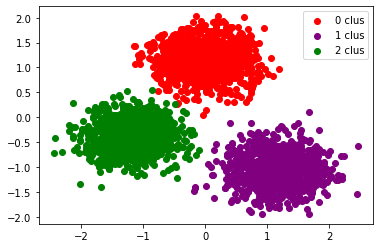

In [95]:
plt.scatter(data=d1_0,x='V1',y='V2',color='red',label='0 clus')
plt.scatter(data=d1_1,x='V1',y='V2',color='purple',label='1 clus')
plt.scatter(data=d1_2,x='V1',y='V2',color='green',label='2 clus')
plt.legend()

In [58]:
from sklearn.metrics import silhouette_score

In [59]:
print('silhouette_score with std is',silhouette_score(d1_,label))

silhouette_score with std is 0.7547796762976798
